# Análisis Predictivo de Series Temporales

-----

## Modelos en espacio de estados:

## Modelo lineal dinámico (Dynamic Linear Model)

In [1]:
install.packages("devtools")     # only need to do this once
devtools::install_github("nickpoison/astsa")
#install.packages("astsa")
library(astsa)
options(repr.plot.width=10, repr.plot.height=6) #ajusta tamaño de graficas


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'astsa' from a github remote, the SHA1 (3abee95d) has not changed since last install.
  Use `force = TRUE` to force installation



## Modelos en espacio de estados:

La idea de los modelos en espacio de estados es poder representar procesos que tienen una *dinámica interna*, es decir:

 * Poseen un *estado* $x_t$, que evolucione en el tiempo, y que en general no es observable.
 * Podemos medir uno o más valores $y_t$, denominados *observaciones*, y cuyo comportamiento depende del estado $x_t$ en que se encuentra el proceso.
 
### Problemas:

 * Dadas las observaciones $y_0,\ldots,y_n$, ¿como reconstruimos $x_0,\ldots,x_n$?
 * Dado un conjunto de observaciones $y_0,\ldots,y_n$, ¿cómo ajustamos un modelo a la evolución del estado $x$?
 * ¿Como podemos predecir estados/observaciones futuras?

### Diagrama:

![espacio_estados](statespace.png "Estados y obsevaciones")


### Ejemplos de modelos:

 * Modelos con estados continuos y observaciones continuas (sistemas dinámicos de tiempo discreto con ruido)
     
     * Para ello se estudian herramientas matriciales, en particular el filtro de Kalman.
     * Se aplican en general cuando hay un modelo físico subyacente.
     * Un ejemplo de esto es el **Modelo lineal dinámico**.
     
 * Modelos con estados discretos y observaciones discretas o continuas.
     
     * En este caso una buena técnica es usar Modelos de Markov Escondidos.
     * Los estados representan situaciones en las que se encuentra el sistema que generan respuestas distintas de acuerdo a ellos (ej: lluvioso/seco, símbolo transmitido 0 o 1, etc.)

## Dynamic Linear Model (DLM)

El modelo lineal dinámico es un modelo en espacio de estados que se compone de:

* Un *estado* $x_t$, posiblemente vectorial para representar un conjunto de estados del sistema.
* Una *dinámica lineal* que dice como evoluciona $x_t$ e incluye el *ruido de estado* $w_t$.
* Una *observación* $y_t$, posiblemente vectorial para representar múltiples medidas relacionadas.
* Una *ecuación de observación* lineal que relaciona el estado con las observaciones e incluye el *ruido de observación* $v_t$.

### Ecuación del DLM

* Ecuación de estado:

$$ x_{t+1} = \Phi x_t + w_t.$$

con $x_t\in \mathbb{R}^p$, $\Phi$ matriz de $p\times p$ y $w_t$ ruido blanco gaussiano de dimensión $p$ con matriz de covarianzas $Q$.

* Ecuación de observación:

$$ y_t = A x_t + v_t,$$

con $y_t\in \mathbb{R}^q$, $A$ matriz de $q\times p$ y $v_t$ ruido blanco gaussiano de dimensión $q$ con matriz de covarianzas $R$.

Asumimos además que los ruidos $w_t$ y $v_t$ son independientes, y que el estado inicial $x_0$ tiene una distribución $N(\mu_0,\Sigma_0)$ conocida.

### Variantes:

* La matriz de observación $A$ puede depender del tiempo $A_t$. En este caso el proceso $x$ es estacionario pero no las observaciones. Puede ser útil para modelar datos faltantes ($A_t=0$ en algún $t$).

* La matriz $\Phi$ puede depender del tiempo $\Phi_t$, aquí tenemos un DLM no homogéneo en el tiempo.

* Se puede incorporar una entrada $u_t$ conocida o no que afecte tanto a estado y observación (sirve para modelar tendencias):

$$ x_{t+1} = \Phi x_t + B u_t +  w_t.$$

$$ y_t = A x_t + Cu_t + v_t,$$


### Ejemplo: AR(1) y AR(1) con ruido de observación

Supongamos que $x_t$ es un proceso AR(1) real dado por:

$$x_{t+1} = \phi x_t + w_t$$

* Si podemos observar $x$ directamente, coincide con un modelo de espacio de estados siendo $\Phi = \phi$, $Q = \sigma_w^2$, $A=1$ (o la identidad) y $R=0$ (o sea $v_t=0$ siempre).

* Si no podemos observar $x$ sino una versión alterada del mismo tenemos:

$$x_{t+1} = \phi x_t + w_t,$$
$$y_t = x_t + v_t.$$

donde $v_t$ es ruido blanco Gaussiano de varianza $R=\sigma_v^2$.

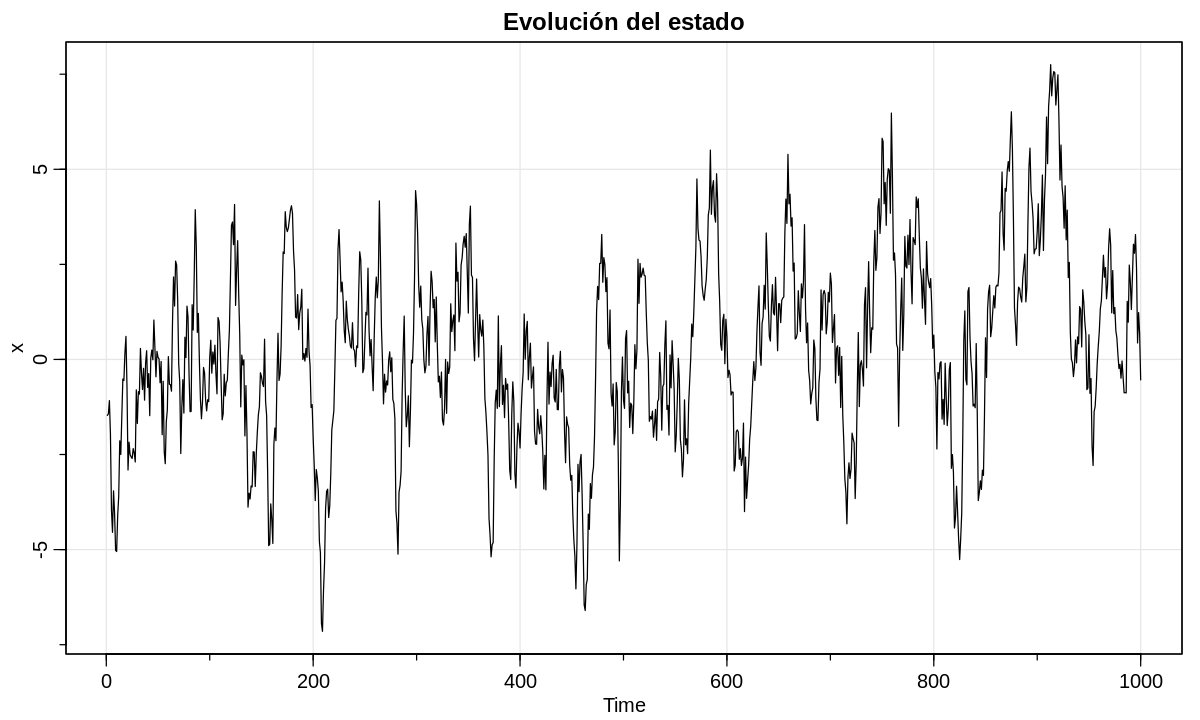

In [2]:
## ejemplo, tomemos phi=0.9, sigma_w^2=1 y variemos sigma_v^2

#total de observaciones
T=1000

x <- arima.sim(n = T, list(ar = 0.9))
tsplot(x, ylab="x", main="Evolución del estado")

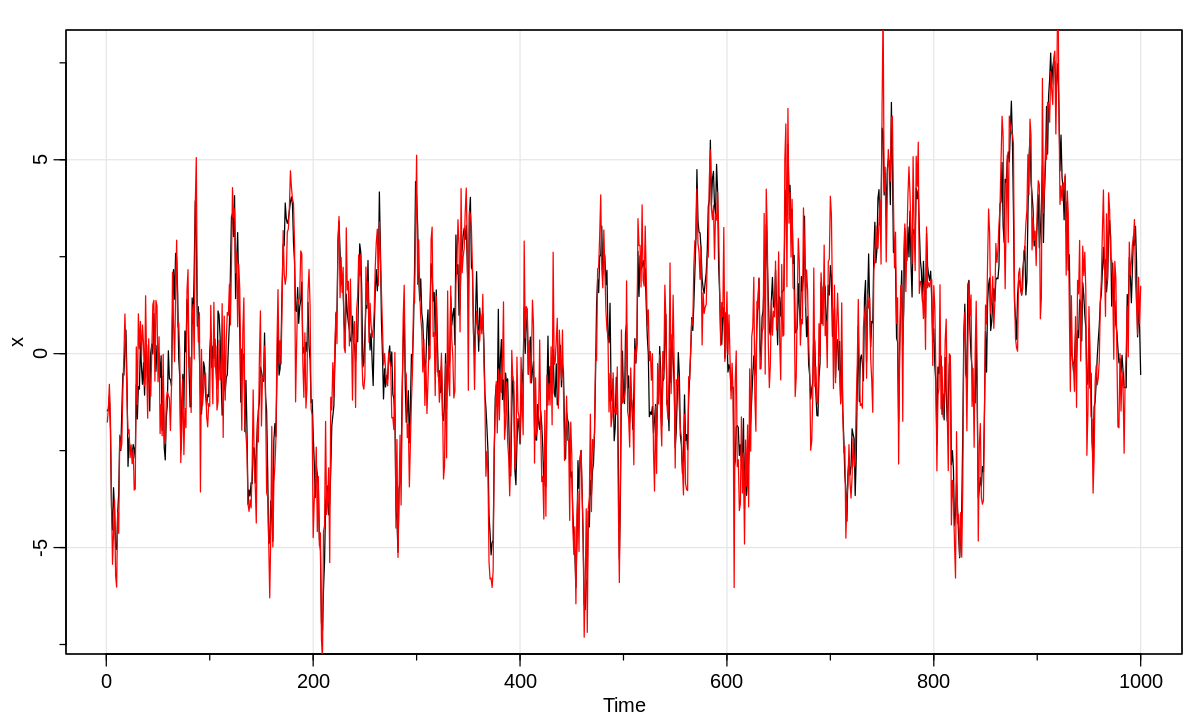

In [3]:
sigmav2 <- 1

v <- sigmav2*rnorm(T)
y <- x+v

tsplot(x)
lines(y, col="2")

ACF,0.79,0.72,0.67,0.62,0.56,0.51,0.45,0.40,0.36,0.32,⋯,0.00,0.00,0,0.01,0.01,0.01,0.02,0.02,0.04,0.04
PACF,0.79,0.25,0.12,0.05,-0.02,-0.01,-0.03,-0.03,-0.01,-0.01,⋯,0.02,-0.01,0,0.01,0.01,0.00,0.00,0.01,0.04,-0.01


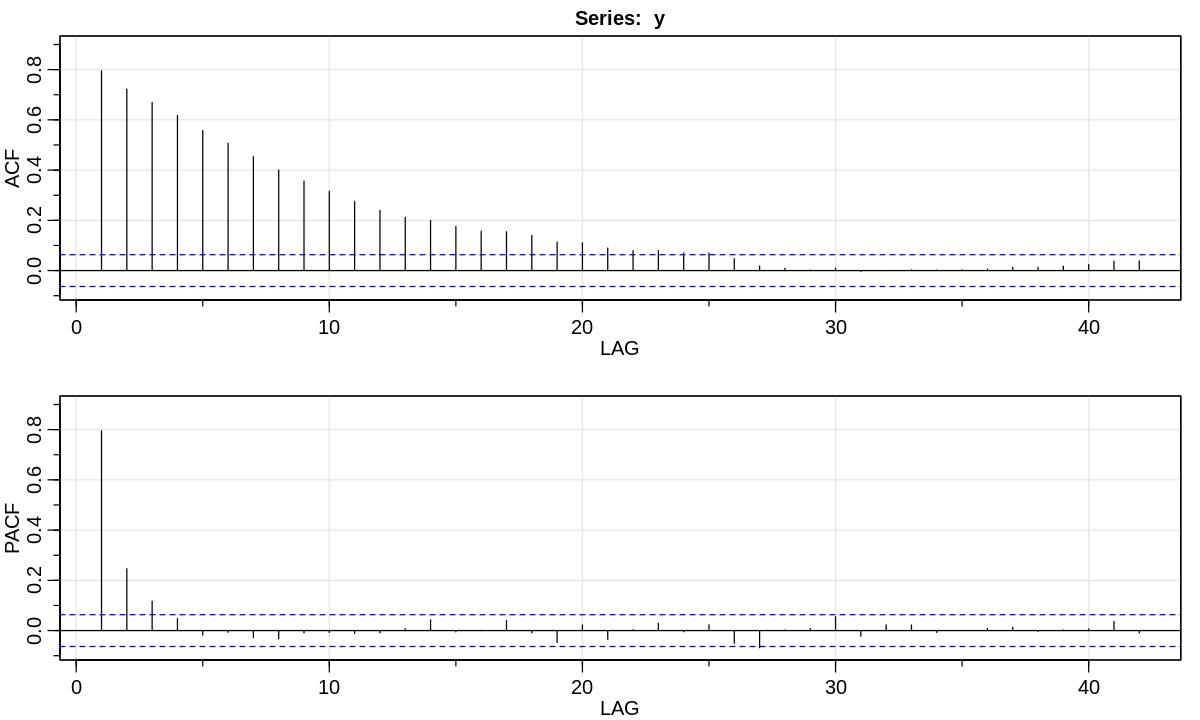

In [4]:
acf2(y)

ACF,0.92,0.84,0.78,0.72,0.65,0.59,0.53,0.48,0.43,0.38,⋯,-0.02,-0.01,-0.01,-0.01,0.00,0.01,0.02,0.03,0.04,0.05
PACF,0.92,0.04,0.03,-0.04,-0.04,-0.03,-0.01,-0.01,0.01,-0.01,⋯,0.01,0.02,-0.02,-0.04,0.02,0.06,0.02,0.02,0.02,-0.01


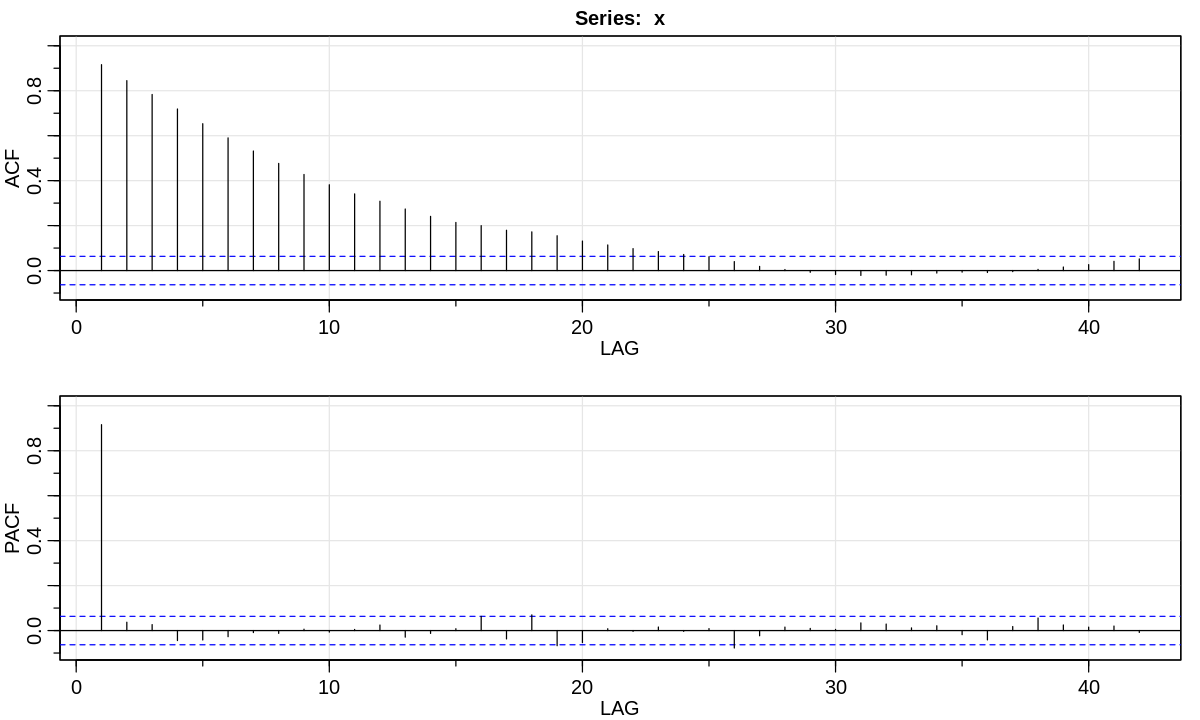

In [5]:
acf2(x)

**Observación:** Al medir el proceso $x$ a través de ruido, la estructura de correlación cambia. No podemos observar que el proceso subyacente es en realdiad AR(1).

* De hecho, se puede probar que este proceso se puede escribir como un ARMA(1,1).

* En general, los procesos ARMA se pueden escribir en espacio de estados, y viceversa, pero el modelo de espacio de estados es mucho más flexible de ajustar y permite modelar otros efectos.

* A modo de ejemplo, podemos modelar un proceso donde tomamos varias observaciones de un mismo estado.

### Ejemplo: Calentamiento global

Consideremos las series:
 * `globtemp` que mide desviaciones de la temperatura media global (continentes y océanos)
 * `globtempl` que mide desviaciones de temperatura en la superficie usando estaciones meteorológica (por lo tanto, continentes).

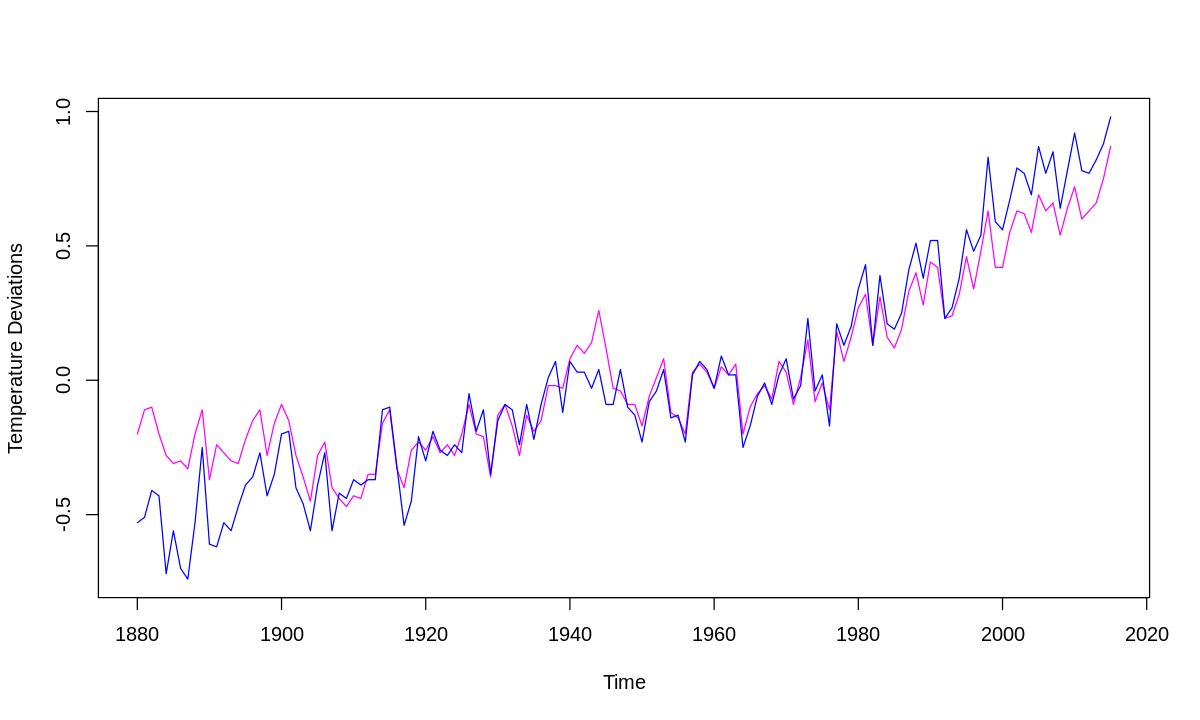

In [6]:
ts.plot(globtemp, globtempl, col=c(6,4), ylab='Temperature Deviations')

Podemos suponer que en realidad hay una única magnitud física $x_t$ que estamos midiendo de dos maneras distintas. En ese caso:

$$y_{t1} = x_t + v_{t1}, \quad y_{t1} = x_t + v_{t1},$$

o bien matricialmente:

$$y_t = \begin{pmatrix} 1 \\ 1 \end{pmatrix} x_t + \begin{pmatrix} v_{t1}\\ v_{t2} \end{pmatrix}$$

siendo $y_{t1}$ e $y_{t2}$ las series y $v_{t1}$ y $v_{t2}$ los ruidos de observación de cada una.



Si suponemos que el proceso subyacente $x_t$ es un paseo al azar con deriva:

$$ x_t = \delta + x_{t-1} + w_t,$$

Entonces el modelo completo es un modelo de espacio de estados con:

* Estado $x_t$, $\Phi=1$, ruido de estado $w_t$, varianza $Q=\sigma_w^2$.
* Entrada $u_t= \delta$ constante.
* Observación $y_t$ con matriz $A=(1\; 1)^T$ y ruido de observación $v_t$ con covarianza $R$ (de 2x2).

## Estimación de estados

Un primer problema es, dado un conjunto de observacions $\{y_1,\ldots,y_s\} = y^s$ hasta tiempo $s$, estimar el valor de $x_t$ subyacente.

* Si $t=s$ el problema se llama *filtrado* (filtering), es decir recuperar el estado actual de las observaciones hasta ahora.
* Si $t<s$, el problema se llama *suavizado* (smoothing) porque puedo usar información del futuro para recuperar el estado.
* Si $t>s$, tenemos el problema de *predicción*.

La solución a este problema es el **filtro de Kalman** o el **suavizador de Kalman**, según el caso.

**Definiciones:**

* $x_t^s = E[x_t \mid y^s]$ es el valor medio de $x_t$ con la información disponible hasta $s$ y es el estimador que precisamos.

* $P^s_{t_1,t_2} = E\left[(x_{t_1}-x_{t_1}^s)(x_{t_2}-x_{t_2}^s)\right]$ es la matriz de  covarianzas del error de estimación. Si $t_1=t_2=t$ lo denotamos por $P_t^s$.


### Filtro de Kalman

Comencemos con el caso $s=t$, en este caso queremos hallar el mejor estimador de $x_t$ usando $y_1,\ldots,y_t$. El mejor estimador en términos de error cuadrático medio es:

$$x_t^t = E[x_t \mid y^t]$$

En el caso Gaussiano, este estimador se puede hallar mediante una recursión denominada *filtro de Kalman*. A su vez, $P_t^t$ es la matriz de covarianzas del error de estimación del estado, lo que permite construir intervalos de confianza.



### Filtro de Kalman, algoritmo.

Dado un modelo en espacio de estados como los anteriores, con condición inicial $N(\mu_0,\Sigma_0)$ realizamos la siguiente iteración.

1. Se fija $x_0^0 = \mu_0$ y $P_0^0 = \Sigma_0$ es decir la estimación inicial corresponde a la condición inicial.

2. Se actualiza la predicción del estado siguiente usando la info hasta $t-1$ y su error:

    $$ x_t^{t-1} = \Phi x_{t-1}^{t-1} + B u_t, $$
    
    $$ P_{t}^{t-1} = \Phi P_{t-1}^{t-1} \Phi^T + Q.$$
    
3. Considero la nueva información $y_t$ y *corrijo la estimación*:

    $$ x_t^t = x_t^{t-1} + K_t (y_t - Ax_t^{t-1} - Cu_t), $$
    
    $$ P_{t}^{t} = [Id-K_tA] P_{t}^{t-1}.$$

    siendo $K_t = P_t^{t-1} A^T[AP_{t-1}^t A^T + R]^{-1}$ la *ganancia de Kalman*.
    
4. Si tengo $n$ muestras, itero 2 y 3 hasta $n$ la cantidad de muestras. Si continúo el paso 2 para $t>n$ construyo las predicciones.

### Ejemplo: local level model

Este es un modelo muy similar al analizado más arriba para temperatura, pero sin drift. El nivel local $x_t$ sigue un paseo al azar:

$$x_t = x_{t-1} + w_t,$$

y la observación es el nivel local más un ruido:

$$y_t = x_t + v_t.$$


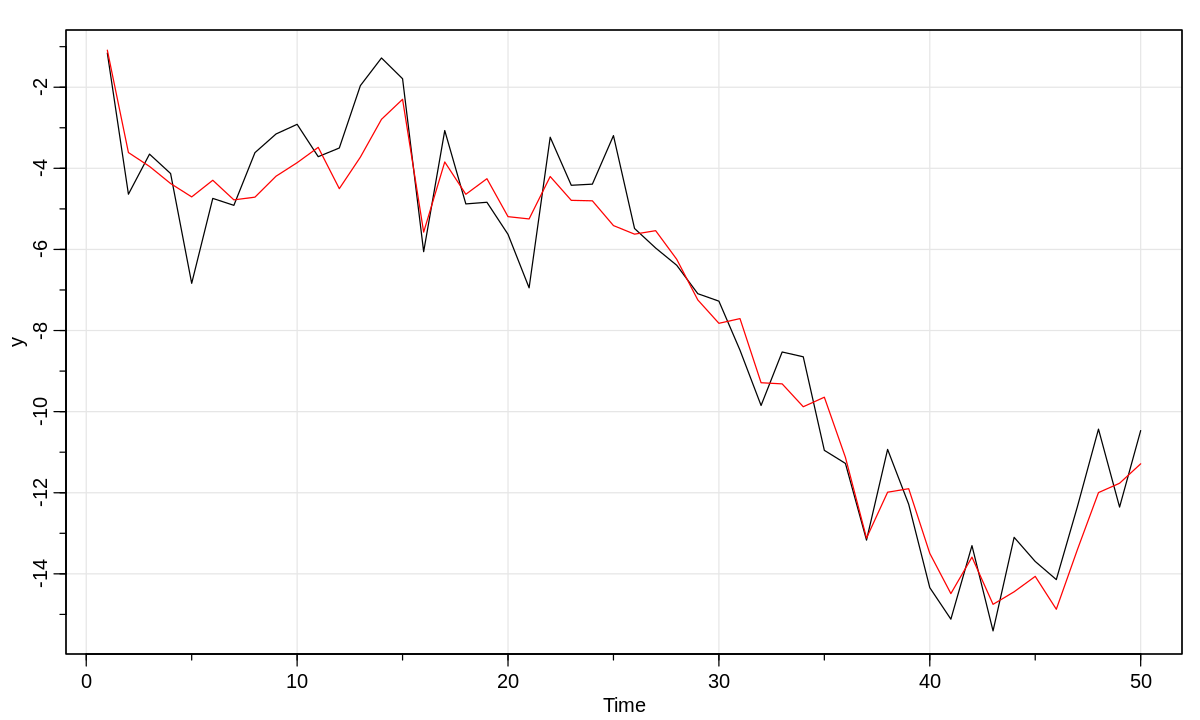

In [7]:
# genero el proceso
num = 50
sigmaw=1
sigmav=1

w = rnorm(num+1,0,sd=sigmaw); v = rnorm(num,0,sd=sigmav)
x = cumsum(w) # estado, contiene uno mas por la condicion inicial
y = x[-1] + v #observaciones.

tsplot(y)
lines(x[-1],col=2)

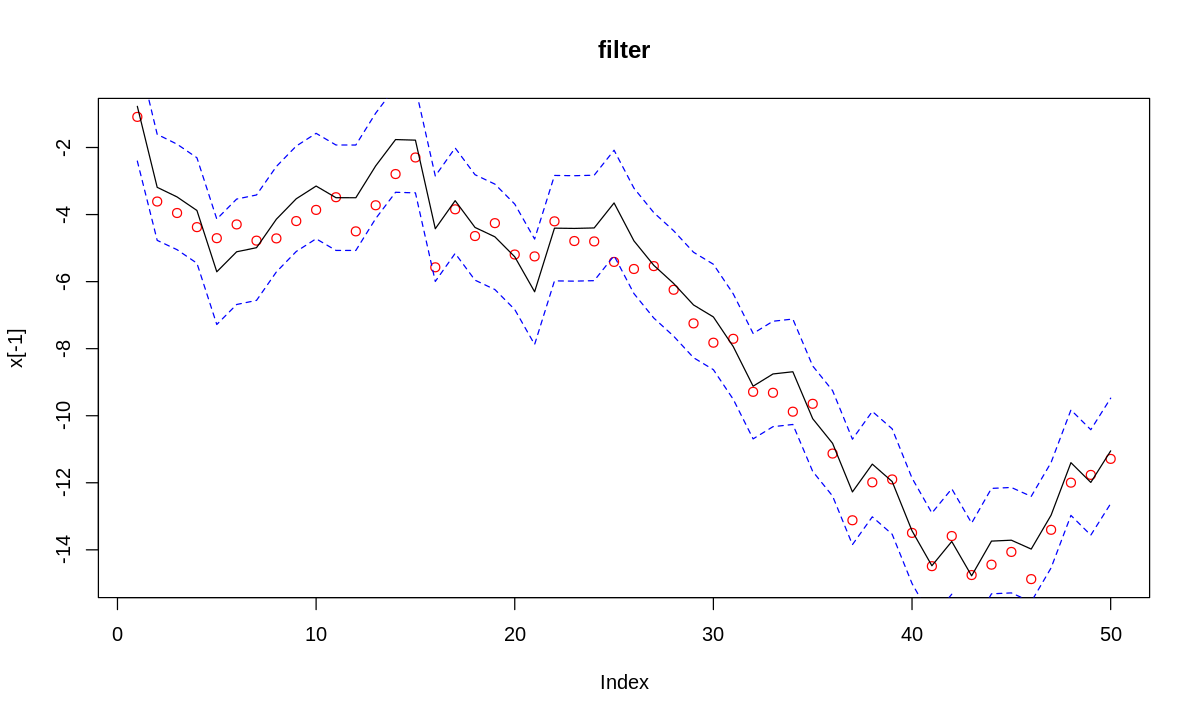

In [8]:
# Filtrado: trato de reconstruir el valor actual de x a partir de y y la historia
ks = Kfilter0(num, y, A=1, mu0=0, Sigma0=1, Phi=1, cQ=sigmaw^2, cR=sigmav^2)


# start figure
plot(x[-1], main='filter',col=2)
lines(ks$xf)
lines(ks$xf+2*sqrt(ks$Pf), lty=2, col=4)
lines(ks$xf-2*sqrt(ks$Pf), lty=2, col=4)


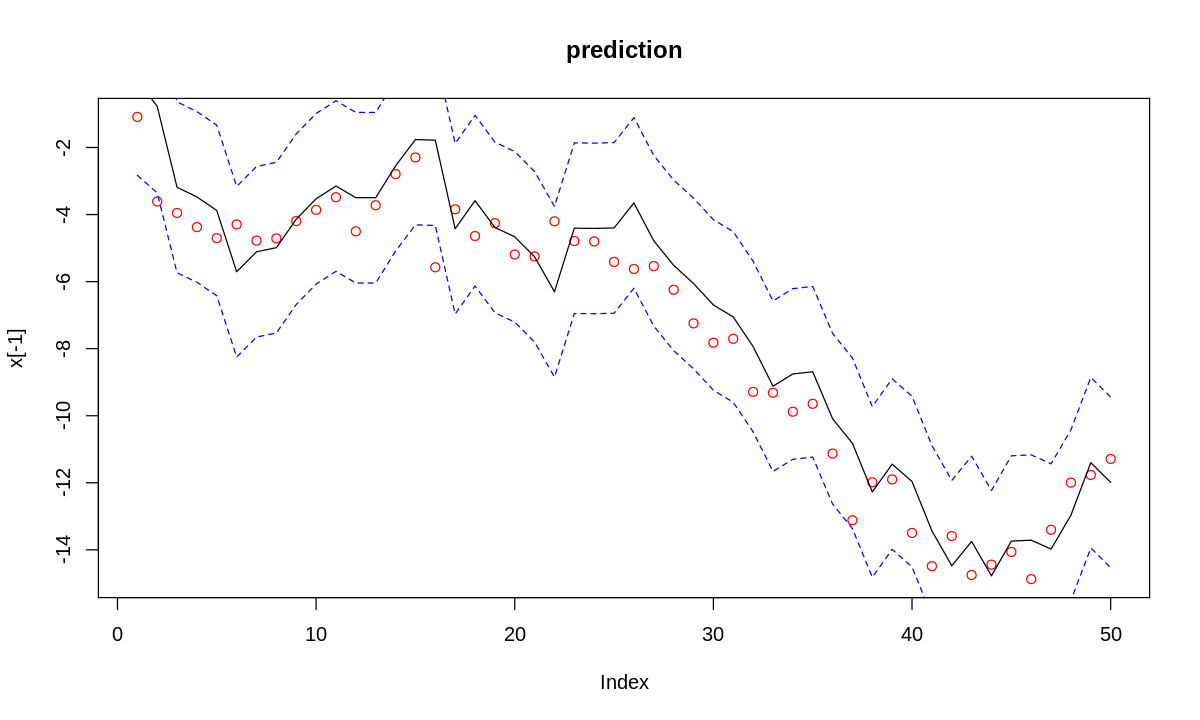

In [9]:
# Predicción: trato de reconstruir el valor siguiente de x con los valores de y hasta el actual
# Como es la misma recursion, la misma funcion hace ambas.
# Notar que el error es mayor porque no podemos corregir con la nueva observacion

ks = Kfilter0(num, y, A=1, mu0=0, Sigma0=1, Phi=1, cQ=sigmaw^2, cR=sigmav^2)

plot(x[-1], main='prediction',col=2)
lines(ks$xp)
lines(ks$xp+2*sqrt(ks$Pp), lty=2, col=4)
lines(ks$xp-2*sqrt(ks$Pp), lty=2, col=4)


### Suavizador de Kalman

El suavizado de Kalman consiste en hacer una recursión de tipo forward-backward, similar a la discutida para HMM (la idea es esecialmente la misma).

* Se calcula una pasada "forward" usando el filtro de Kalman.
* Se propaga hacia atrás la estimación del estado futuro para corregir las estimaciones intermedias.


### Suavizador de Kalman, algoritmo.

Para un modelo en espacio de estados como el que ya vimos y un conjunto de observaciones $\{y_1,\ldots,y_n\} = y^n$:

1. Se corre el filtro de Kalman hasta hallar $x^n_n$ y $P_n^n$.
2. Se itera $t=n,n-1,\ldots,1$ corrigiendo la estimación de Kalman usando la información del futuro:
 
 $$ x^n_{t-1} = x_{t-1}^{t-1} + J_{t-1}(x^n_t - x_t^{t-1}),$$
 
 $$ P^n_{t−1} = P^{t-1}_{t−1} + J_{t−1}\left(P^t_n − P_t^{t−1}\right) J_{t−1}^T.$$ 

siendo:
$$ J_{t-1} = P_{t-1}^{t-1} \Phi^T (P_t^{t-1})^{-1}.$$


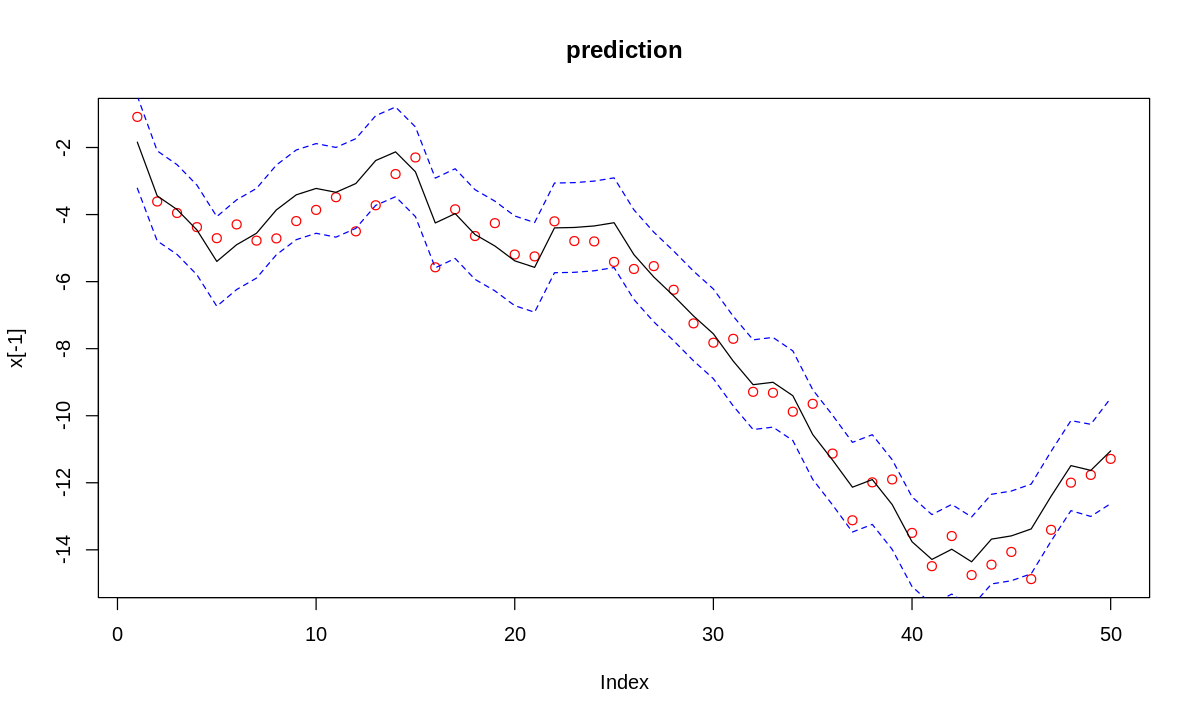

In [10]:
# Suavizado: trato de reconstruir toda la serie x usando todos los valores de y
# Notar que el error es menor que en el filtrado porque usa mas info.

ks = Ksmooth0(num, y, A=1, mu0=0, Sigma0=1, Phi=1, cQ=sigmaw^2, cR=sigmav^2)

plot(x[-1], main='prediction',col=2)
lines(ks$xs)
lines(ks$xs+2*sqrt(ks$Ps), lty=2, col=4)
lines(ks$xs-2*sqrt(ks$Ps), lty=2, col=4)

## Ajuste de un modelo lineal dinámico

Una consecuencia del filtro de Kalman es que podemos calcular las llamadas *innovaciones* como parte de la misma recursión:

$$\epsilon_t = y_t − E[y t \mid y^{t-1}] = y_t − Ax_t^{t−1} − Cu_t,$$

y sus varianzas

$$\Sigma_t = AP^{t-1}_t A^T + R.$$

Se tiene el siguiente:

> **Teorema:** La secuencia de innovaciones $\{\epsilon_t\}$ constituye una secuencia de vectores gaussianos independientes de media $0$ y covarianzas $\Sigma_t$.

La clave de lo anterior es que permite escribir la verosimilitud de las innovaciones de manera explícita, y por consiguiente correr algoritmos de máxima verosimilitud.

### Parámetros a ajustar

En algunos problemas, podemos conocer parcialmente el modelo y solo debemos estimar las covarianzas $Q$ y $R$. En otros no conocemos nada de lo subyacente, salvo cómo se computan las observaciones a partir del estado ($A$). En ese caso, los parámetros del modelo son:

$$\Theta = \{\Phi, Q, R\},$$

en el caso sin entradas.

### Estimación por máxima verosimilitud

**Algoritmo:**

1. Construyo una estimación inicial de $\Theta^0$.
2. Se corre el filtro de Kalman y se calcula una muestra de innovaciones $\epsilon_t^k$.
3. Se estima por máxima verosimilitud los parámetros $\Theta^k$ usando la muestra de innovaciones (o se hace una bajada por gradiente o Newton de la verosimilitud).
4. Se actualiza $\Theta$ a $\Theta^k$ y se vuelve a 2. hasta convergencia.

### Ejemplo: ajuste por máxima verosimilitud del modelo de temperatura global


$$ x_t = \delta + x_{t-1} + w_t,$$

$$y_t = \begin{pmatrix} 1 \\ 1 \end{pmatrix} x_t + \begin{pmatrix} v_{t1}\\ v_{t2} \end{pmatrix}$$

Entonces el modelo completo es un modelo de espacio de estados con:

* Estado $x_t$, $\Phi=1$, ruido de estado $w_t$, varianza $Q=\sigma_w^2$.
* Entrada $u_t= \delta$ constante.
* Observación $y_t$ con matriz $A=(1\; 1)^T$ y ruido de observación $v_t$ con covarianza $R$ (de 2x2).

In [11]:
# Setup 
y = cbind(globtemp, globtempl)
num = nrow(y)
input = rep(1,num)
A = array(rep(1,2), dim=c(2,1,num))
mu0 = -.35; Sigma0 = 1;  Phi = 1

In [12]:
# Function to Calculate Likelihood 
Linn=function(para){
 cQ = para[1]      # sigma_w
  cR1 = para[2]    # 11 element of chol(R)
  cR2 = para[3]    # 22 element of chol(R)
  cR12 = para[4]   # 12 element of chol(R)
 cR = matrix(c(cR1,0,cR12,cR2),2)  # put the matrix together
 drift = para[5]
 kf = Kfilter1(num,y,A,mu0,Sigma0,Phi,drift,0,cQ,cR,input)
 return(kf$like) 
 }

In [13]:
# Estimation
init.par = c(.1,.1,.1,0,.05)  # initial values of parameters
(est = optim(init.par, Linn, NULL, method="BFGS", hessian=TRUE, control=list(trace=1,REPORT=1))) ##optimizador de R
SE = sqrt(diag(solve(est$hessian))) 

# Summary of estimation  
estimate = est$par; u = cbind(estimate, SE)
rownames(u)=c("sigw","cR11", "cR22", "cR12", "drift"); u  

initial  value -411.324427 
iter   2 value -426.036689
iter   3 value -433.552406
iter   4 value -435.309812
iter   5 value -435.812931
iter   6 value -436.293842
iter   7 value -437.471877
iter   8 value -440.321476
iter   9 value -441.702499
iter  10 value -442.207661
iter  11 value -442.566939
iter  12 value -442.773183
iter  13 value -442.786947
iter  14 value -442.816191
iter  15 value -442.847605
iter  16 value -442.893632
iter  17 value -442.943235
iter  18 value -442.971593
iter  19 value -442.972642
iter  20 value -442.972877
iter  20 value -442.972884
iter  20 value -442.972884
final  value -442.972884 
converged


16049.8803,15522.8553,1531.3139,-3056.1823,-393.5183
15522.8553,33596.2449,-3152.0105,-7422.5391,374.2193
1531.3139,-3152.0105,12537.5987,4427.7293,-409.0193
-3056.1823,-7422.5391,4427.7293,3502.8070,347.2511
-393.5183,374.2193,-409.0193,347.2511,44061.8248


,estimate,SE
sigw,0.05501124,0.011358852
cR11,0.07418174,0.009856923
cR22,0.12694400,0.015481675
cR12,0.12925308,0.038230357
drift,0.00649545,0.004787053


In [14]:
# Smooth (first set parameters to their final estimates)
cQ    = est$par[1]  
 cR1  = est$par[2]   
 cR2  = est$par[3]   
 cR12 = est$par[4]  
cR    = matrix(c(cR1,0,cR12,cR2), 2)
(R    = t(cR)%*%cR)    #  to view the estimated R matrix
drift = est$par[5]  
ks    = Ksmooth1(num,y,A,mu0,Sigma0,Phi,drift,0,cQ,cR,input)  

0.005502931,0.009588218
0.009588218,0.032821136


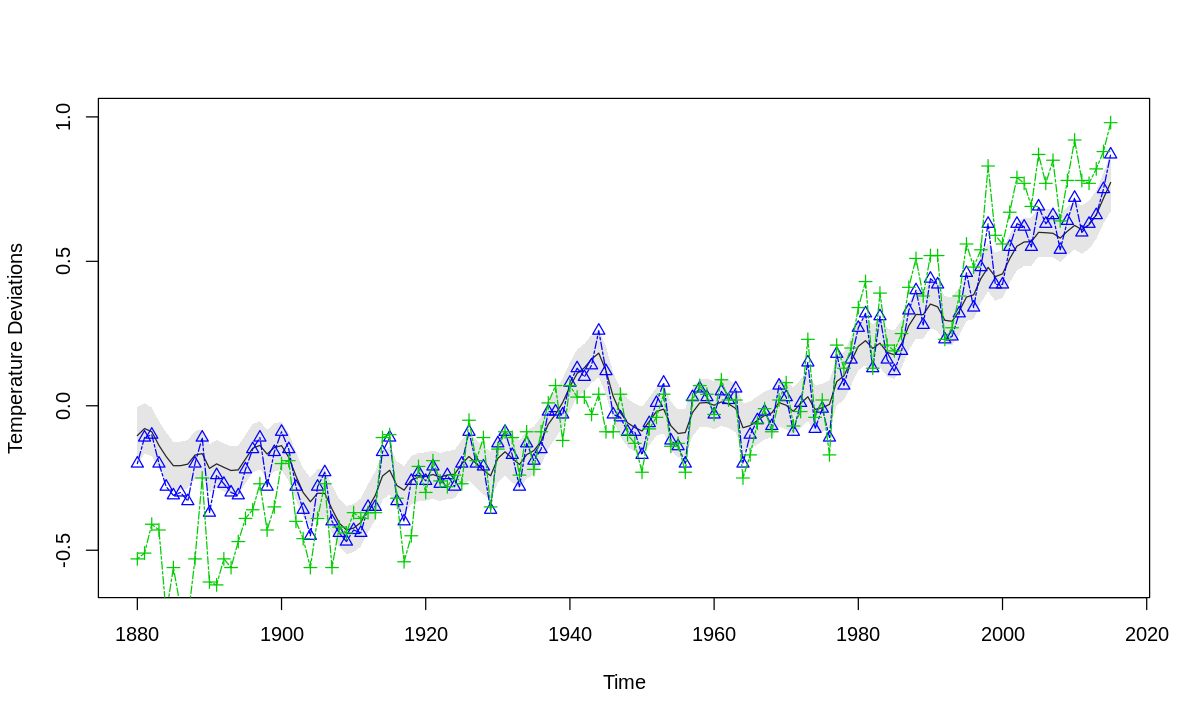

In [15]:
# Plot 
xsm  = ts(as.vector(ks$xs), start=1880)
rmse = ts(sqrt(as.vector(ks$Ps)), start=1880)
plot(xsm, ylim=c(-.6, 1), ylab='Temperature Deviations')
  xx = c(time(xsm), rev(time(xsm)))
  yy = c(xsm-2*rmse, rev(xsm+2*rmse))
polygon(xx, yy, border=NA, col=gray(.6, alpha=.25))
lines(globtemp, type='o', pch=2, col=4, lty=6)
lines(globtempl, type='o', pch=3, col=3, lty=6)

### Estimación por Expectation-Maximization

Esta estimación sigue la misma idea vista para Hidden Markov Models, pero es más complicada de derivar.

El algoritmo básico consiste en:

1. Elegir una condición inicial de parámetros $\Theta_0$.
2. Usando $\Theta_{k-1}$ como verdadero, reconstruir $x^k_t$ a partir de las observaciones $y^n$ usando el suavizador de Kalman.
3. Reestimar los parámetros usando la llamada verosimilitud parcial, que es el valor medio de la verosimilitud de (x,y) condicionada a las observaciones y construir $\Theta_k$.
4. Iterar 2 y 3 hasta convergencia.

La ventaja de este método es que se puede aplicar aún con datos faltantes (ej: no conozco todos los $y$ tampoco).

#### Ejemplo:

Ajuste de un modelo de espacio de estados a datos  biomédicos longitudinales (pero salteados) en pacientes con tratamiento de transplante de médula:

* Conteo de Leucocitos [WBC]
* Conteo de plaquetas [PLT]
* Hematocrito [HCT]

Se desee estimar valores suponiendo un modelo de espacio de estados y rellenar los faltantes.

In [16]:
y    = cbind(WBC, PLT, HCT)
num  = nrow(y)       
A    = array(0, dim=c(3,3,num))  # creates num 3x3 zero matrices
for(k in 1:num) if (y[k,1] > 0) A[,,k]= diag(1,3) 

# Initial values 
mu0    = matrix(0,3,1) 
Sigma0 = diag(c(.1,.1,1) ,3)
Phi    = diag(1,3)
cQ     = diag(c(.1,.1,1), 3)
cR     = diag(c(.1,.1,1), 3)  
(em = EM1(num, y, A, mu0, Sigma0, Phi, cQ, cR, 100, .001))    

iteration    -loglikelihood 
    1          68.28328 
    2          -183.9361 
    3          -194.2051 
    4          -197.5444 
    5          -199.7442 
    6          -201.6431 
    7          -203.4226 
    8          -205.1253 
    9          -206.7595 
    10          -208.3251 
    11          -209.8209 
    12          -211.2464 
    13          -212.602 
    14          -213.8891 
    15          -215.1094 
    16          -216.2651 
    17          -217.3589 
    18          -218.3931 
    19          -219.3705 
    20          -220.2935 
    21          -221.1649 
    22          -221.9869 
    23          -222.762 
    24          -223.4924 
    25          -224.1805 
    26          -224.8282 
    27          -225.4377 
    28          -226.0109 
    29          -226.5495 
    30          -227.0555 
    31          -227.5305 
    32          -227.9762 
    33          -228.3941 
    34          -228.7857 
    35          -229.1524 
    36          -229.4956 
    37     

$Phi
            [,1]        [,2]        [,3]
[1,]  0.98052698 -0.03494377 0.008287009
[2,]  0.05279121  0.93299479 0.005464917
[3,] -1.46571679  2.25780951 0.795200344

$Q
             [,1]         [,2]       [,3]
[1,]  0.013786772 -0.001724166 0.01882951
[2,] -0.001724166  0.003032109 0.03528162
[3,]  0.018829510  0.035281625 3.61897901

$R
            [,1]      [,2]      [,3]
[1,] 0.007124671 0.0000000 0.0000000
[2,] 0.000000000 0.0168669 0.0000000
[3,] 0.000000000 0.0000000 0.9724247

$mu0
          [,1]
[1,]  2.119269
[2,]  4.407390
[3,] 23.905038

$Sigma0
              [,1]          [,2]          [,3]
[1,]  4.553949e-04 -5.249215e-05  0.0005877626
[2,] -5.249215e-05  3.136928e-04 -0.0001199788
[3,]  5.877626e-04 -1.199788e-04  0.1677365489

$like
 [1]   68.28328 -183.93608 -194.20508 -197.54440 -199.74425 -201.64313
 [7] -203.42258 -205.12530 -206.75951 -208.32511 -209.82091 -211.24639
[13] -212.60202 -213.88906 -215.10935 -216.26514 -217.35887 -218.39311
[19] -219.37048 -220.29354 -221.16485 -221.98686 -222.76196 -223.49243
[25] -224.18049 -224.82824 -225.43771 -226.01085 -226.54953 -227.05552
[31] -227.53054 -227.97621 -228.39410 -228.78569 -229.15242 -229.49563
[37] -229.81661 -230.11659 -230.39674 -230.65816 -230.90189 -231.12893

$niter
[1] 42

$cvg
[1] 0.0009832656

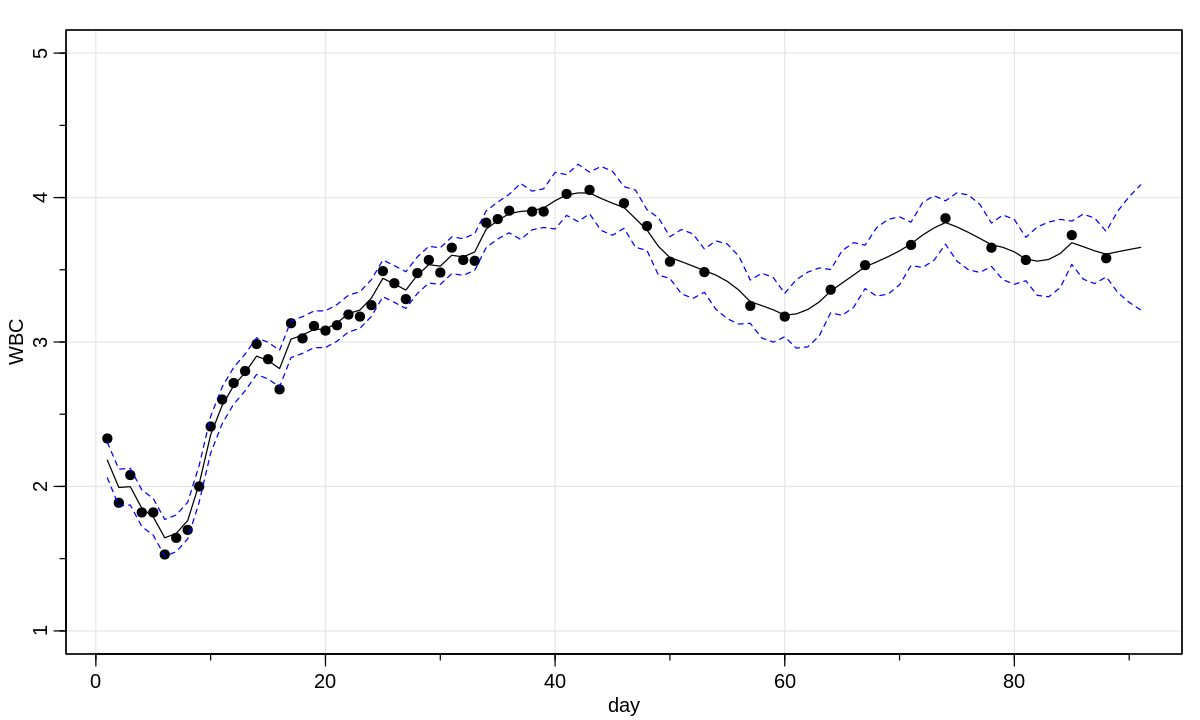

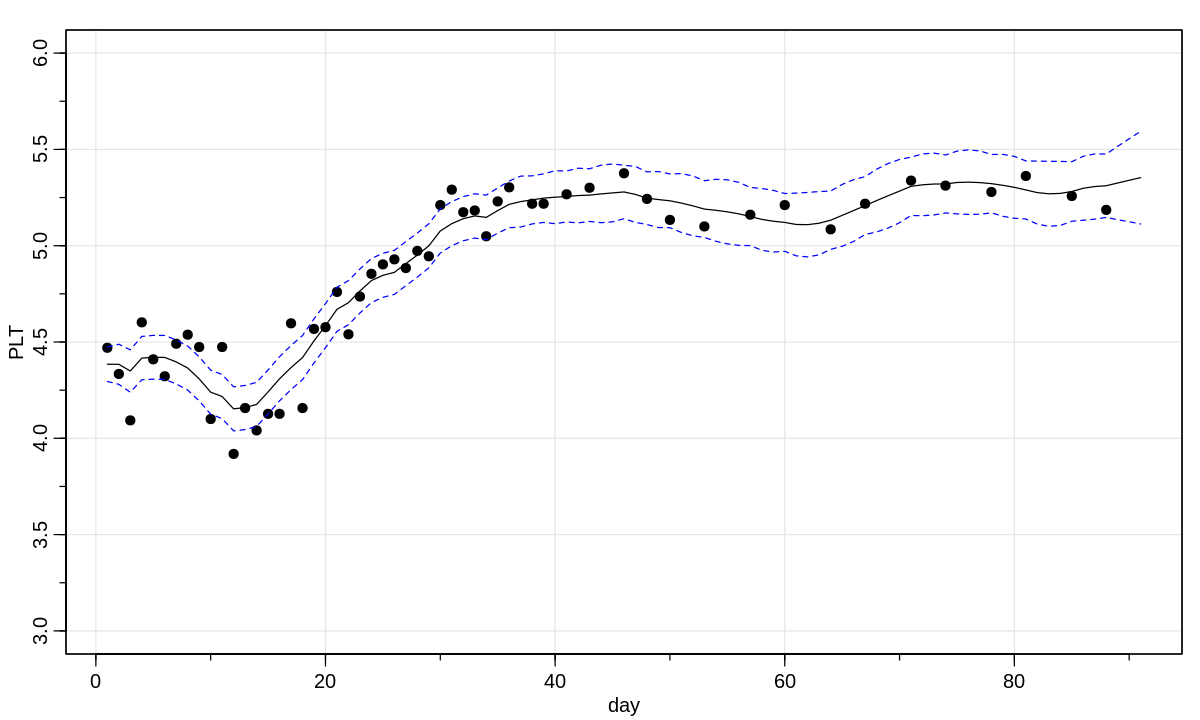

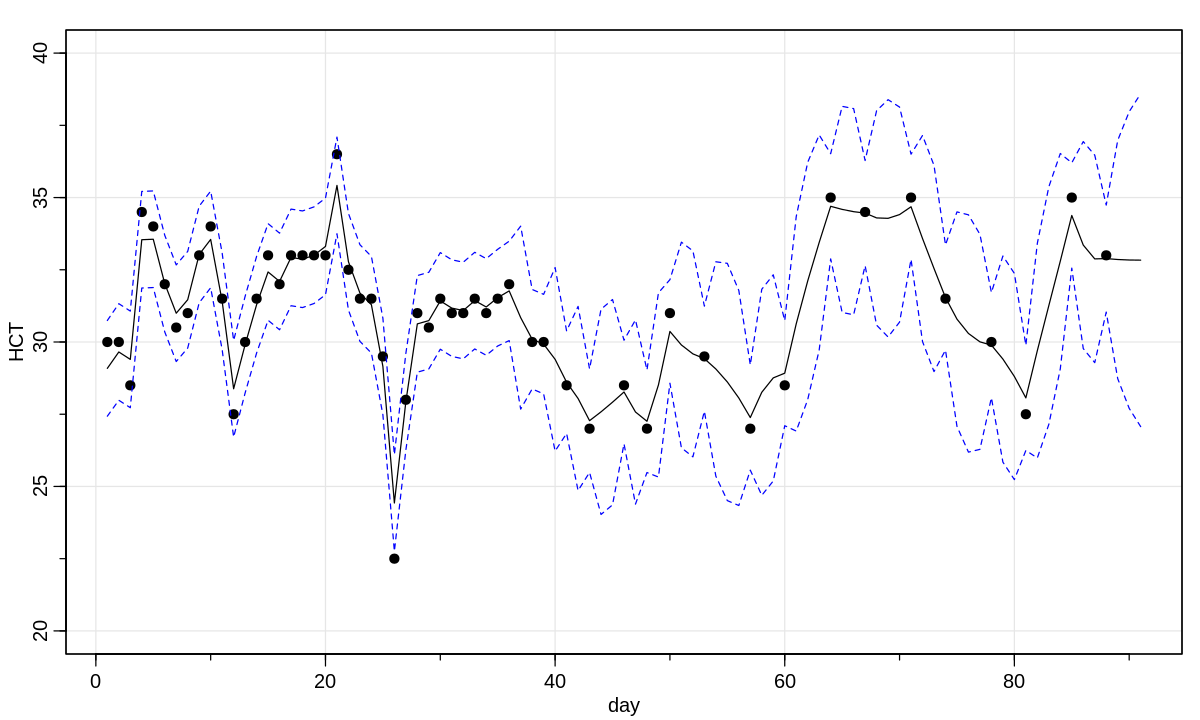

In [17]:
# Graph smoother
ks  = Ksmooth1(num, y, A, em$mu0, em$Sigma0, em$Phi, 0, 0, chol(em$Q), chol(em$R), 0)
y1s = ks$xs[1,,] 
y2s = ks$xs[2,,] 
y3s = ks$xs[3,,]
p1  = 2*sqrt(ks$Ps[1,1,]) 
p2  = 2*sqrt(ks$Ps[2,2,]) 
p3  = 2*sqrt(ks$Ps[3,3,])
tsplot(WBC, type='p', pch=19, ylim=c(1,5), xlab='day')
 lines(y1s) 
 lines(y1s+p1, lty=2, col=4) 
 lines(y1s-p1, lty=2, col=4)
tsplot(PLT, type='p', ylim=c(3,6), pch=19, xlab='day')
 lines(y2s)
 lines(y2s+p2, lty=2, col=4)
 lines(y2s-p2, lty=2, col=4)
tsplot(HCT, type='p', pch=19, ylim=c(20,40), xlab='day')
 lines(y3s)
 lines(y3s+p3, lty=2, col=4) 
 lines(y3s-p3, lty=2, col=4)

### Otros ejemplos:

* Stohcastic volatilty.
* Tracking de vehiculos por GPS.
* Larga lista de etc.

### Bibliotecas relacionadas:

* La biblioteca `dlm` permite trabajar con modelos lineales dinámicos aplicando todo lo anterior (pero sin entradas $u_t$)